## Question
A nationwide survey of hospital costs conducted by the US Agency for Healthcare
consists of hospital records of inpatient samples. The given data is restricted to
the city of Wisconsin and relates to patients in the age group 0-17 years. The
agency wants to analyze the data to research on the healthcare costs and their
utilization

#### Here is a detailed description of the given dataset:


In [56]:
# AGE : Age of the patient discharged
# FEMALE : Binary variable that indicates if the patient is female
# LOS : Length of stay, in days
# RACE : Race of the patient (specified numerically)
# TOTCHG : Hospital discharge costs
# APRDRG : All Patient Refined Diagnosis Related Groups

In [1]:
healthcare_costs <- read.csv('HospitalCosts.csv')
head(healthcare_costs,5)


,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
,<int>,<int>,<int>,<int>,<int>,<int>
1,17,1,2,1,2660,560
2,17,0,2,1,1689,753
3,17,1,7,1,20060,930
4,17,1,1,1,736,758
5,17,1,1,1,1194,754


In [60]:
#Summary of the dataset
summary(healthcare_costs)


      AGE         FEMALE       LOS        RACE        TOTCHG     
 Min.   : 0.000   0:244   Min.   : 0.00   1:484   Min.   :  532  
 1st Qu.: 0.000   1:255   1st Qu.: 2.00   2:  6   1st Qu.: 1218  
 Median : 0.000           Median : 2.00   3:  1   Median : 1538  
 Mean   : 5.096           Mean   : 2.83   4:  3   Mean   : 2778  
 3rd Qu.:13.000           3rd Qu.: 3.00   5:  3   3rd Qu.: 2530  
 Max.   :17.000           Max.   :41.00   6:  2   Max.   :48388  
                                                                 
     APRDRG      APRDRG_Factor
 Min.   : 21.0   640    :266  
 1st Qu.:640.0   754    : 37  
 Median :640.0   753    : 36  
 Mean   :616.3   758    : 20  
 3rd Qu.:751.0   751    : 14  
 Max.   :952.0   755    : 13  
                 (Other):113  

In [3]:
#structure of the data frame 
str(healthcare_costs)

'data.frame':	500 obs. of  6 variables:
 $ AGE   : int  17 17 17 17 17 17 17 16 16 17 ...
 $ FEMALE: int  1 0 1 1 1 0 1 1 1 1 ...
 $ LOS   : int  2 2 7 1 1 0 4 2 1 2 ...
 $ RACE  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TOTCHG: int  2660 1689 20060 736 1194 3305 2205 1167 532 1363 ...
 $ APRDRG: int  560 753 930 758 754 347 754 754 753 758 ...


##         Data Preperation

In [4]:
#We see that the variables RACE and FEMALE are integer variables so we change them to factors
var <- c('RACE','FEMALE')
for (i in var){
  healthcare_costs[,i] = as.factor(healthcare_costs[,i])}
str(healthcare_costs)


'data.frame':	500 obs. of  6 variables:
 $ AGE   : int  17 17 17 17 17 17 17 16 16 17 ...
 $ FEMALE: Factor w/ 2 levels "0","1": 2 1 2 2 2 1 2 2 2 2 ...
 $ LOS   : int  2 2 7 1 1 0 4 2 1 2 ...
 $ RACE  : Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTCHG: int  2660 1689 20060 736 1194 3305 2205 1167 532 1363 ...
 $ APRDRG: int  560 753 930 758 754 347 754 754 753 758 ...


##  Task 1

### To record the patient statistics, the agency wants to find the age category of people who frequent the hospital and have the maximum expenditure. 

we need find the age category that has the highest frequency of hospital visits, we can visualise the frequency using a histogram  

Group: 0-1   Group: 1-2   Group: 2-3   Group: 3-4   Group: 4-5   Group: 5-6 
         306           10            1            3            2            2 
  Group: 6-7   Group: 7-8   Group: 8-9  Group: 9-10 Group: 10-11 Group: 11-12 
           2            3            2            2            4            8 
Group: 12-13 Group: 13-14 Group: 14-15 Group: 15-16 Group: 16-17 
          15           18           25           29           67

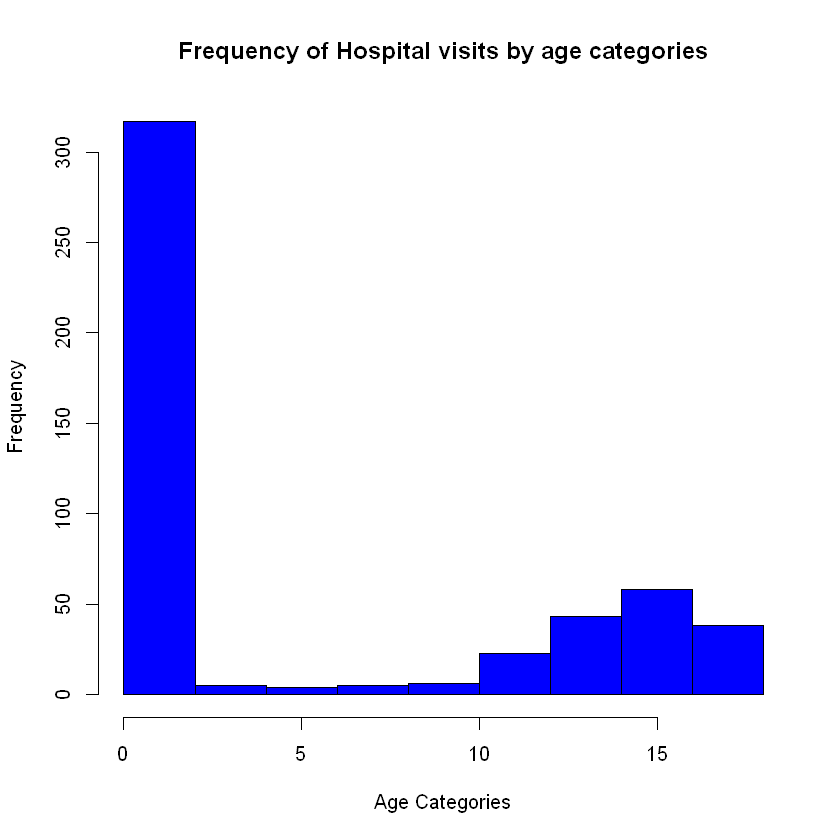

In [30]:
#1. Find the age group with the highest frequency of hospital visits


     breaks <- c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)
    tags <- c('Group: 0-1',' Group: 1-2','Group: 2-3','Group: 3-4','Group: 4-5','Group: 5-6',
              'Group: 6-7','Group: 7-8','Group: 8-9','Group: 9-10','Group: 10-11','Group: 11-12',
              'Group: 12-13','Group: 13-14','Group: 14-15','Group: 15-16','Group: 16-17')

    

    group_tags <- cut(healthcare_costs$AGE,breaks = breaks,include.lowest = TRUE,right = FALSE,
                      labels = tags)
    summary(group_tags)

hist(healthcare_costs$AGE, 
         main="Frequency of Hospital visits by age categories", 
         xlab="Age Categories", 
         border="black", 
         col="blue")


The histogram shows that the age category of 0-1 years  has the highest    frequency of hopital visits,
The summary shows that  we have  307 hospital visits for people in the age range 0-1 years


In [13]:
#2.To find the Age category with the Maximum Expenditure 

    #We first need to find the sum of expendicture for each age group and then find the maximum sum
    #to compute the summary for the data subset we can use the function aggregare

    summary_costs<-aggregate(TOTCHG ~ AGE, FUN = sum, data = healthcare_costs)
    Max_cost <- max(aggregate(TOTCHG ~ AGE, FUN = sum, data = healthcare_costs))
    Max_cost


[1] 678118

In [16]:
#From the summary we see that the maximum expenditure per age group for
# The total hospital discharge cost(TOTCHG) is 678 118 
#  Which is also confirmed by the max function
summary_costs[(summary_costs$TOTCHG == max(summary_costs$TOTCHG)),]

,AGE,TOTCHG
,<int>,<int>
1,0,678118


Result : The age category with the maximum hospital costs is Age category 0-1(AGE =0) 
with a costs 678 118 which makes sense
since the same age category had the highest frequency of hopital visits, followed 
by AGE = 17 and AGE = 15 respectively.



## Task 2

### In order severity of the diagnosis treatments and to find out the expensive treatmetents, the agency wants to find the diagnosis realted group that has maximum hospitalization and expenditure.                                  

In [17]:

#1. Find diagnosis related group that has the maximum hospitalization
  
    unique(healthcare_costs$APRDRG)

    healthcare_costs$APRDRG_Factor <- as.factor(healthcare_costs$APRDRG)
    str(healthcare_costs)

[1] 560 753 930 758 754 347 751 812 566 249 422  50 139 141 420  97 811 755 720
[20]  53 760 710 776 115 602 138 137 640 639 143 254 581 633 626 636  23  57 421
[39] 580 750  49  51 313 614 634 952  21  92 756 317 344 114 206 723 911  54 225
[58]  58 740 308 204 561 863

'data.frame':	500 obs. of  7 variables:
 $ AGE          : int  17 17 17 17 17 17 17 16 16 17 ...
 $ FEMALE       : Factor w/ 2 levels "0","1": 2 1 2 2 2 1 2 2 2 2 ...
 $ LOS          : int  2 2 7 1 1 0 4 2 1 2 ...
 $ RACE         : Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTCHG       : int  2660 1689 20060 736 1194 3305 2205 1167 532 1363 ...
 $ APRDRG       : int  560 753 930 758 754 347 754 754 753 758 ...
 $ APRDRG_Factor: Factor w/ 63 levels "21","23","49",..: 32 51 62 55 52 28 52 52 51 55 ...


In [57]:
#We see that the variable APRDRG has 63 levels
summary(healthcare_costs$APRDRG_Factor)


21  23  49  50  51  53  54  57  58  92  97 114 115 137 138 139 141 143 204 206 
  1   1   1   1   1  10   1   2   1   1   1   1   2   1   4   5   1   1   1   1 
225 249 254 308 313 317 344 347 420 421 422 560 561 566 580 581 602 614 626 633 
  2   6   1   1   1   1   2   3   2   1   3   2   1   1   1   3   1   3   6   4 
634 636 639 640 710 720 723 740 750 751 753 754 755 756 758 760 776 811 812 863 
  2   3   4 266   1   1   2   1   1  14  36  37  13   2  20   2   1   2   3   1 
911 930 952 
  1   2   1

640 
 44

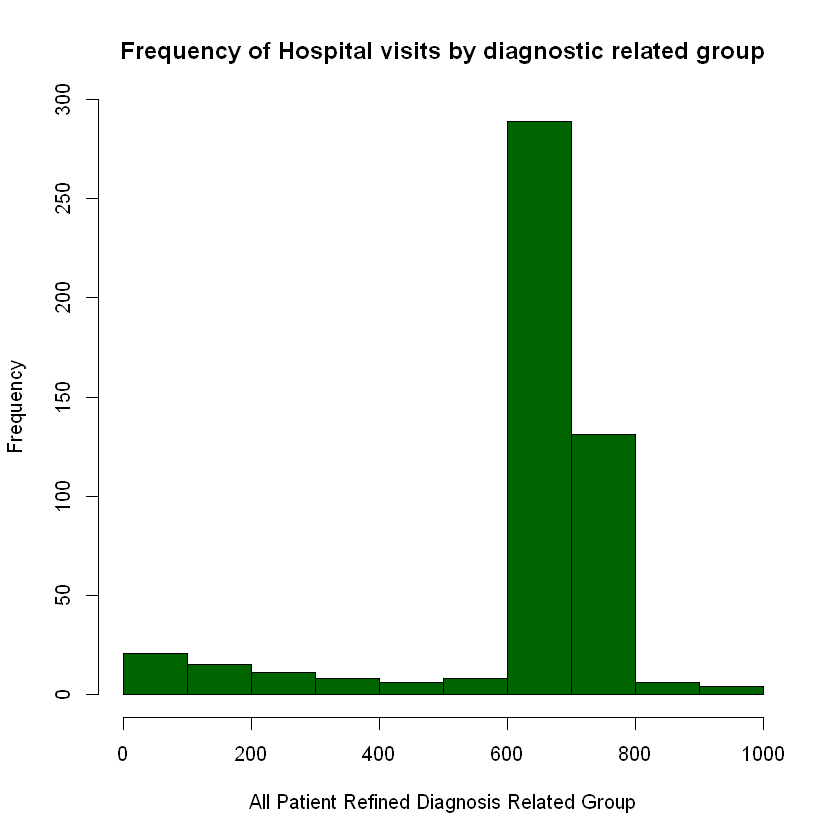

In [32]:
hist(healthcare_costs$APRDRG, 
    main="Frequency of Hospital visits by diagnostic related group",breaks = 10, 
    xlab="All Patient Refined Diagnosis Related Group", 
    border="black", 
    col="darkgreen")
    which.max(summary(healthcare_costs$APRDRG_Factor))



Result: The histogram shows that the All Patient Refined diagnosis Related Group(APRDRG) 
with the maximum hospitalization
is the diagnosis related group betwen 600 and 700
The summary shows that there were 267 hospital visits for the diagnosis related group 640



In [21]:

#2. To find the diagnosis related group with the maximum expenditure,


    #We sum up the expenditure of each diagnosis related group, we then find the maximum value of expenditure 
    # for each group using, we use the aggregate function to sum up the expenditure an  then use
    # the max function to find the max value

    data <-aggregate(TOTCHG ~ APRDRG, FUN = sum, data = healthcare_costs)
    max_costs <- max(aggregate(TOTCHG ~ APRDRG, FUN = sum, data = healthcare_costs))
    max_costs
    data[(data$TOTCHG == max(data$TOTCHG)),]


[1] 437978

,APRDRG,TOTCHG
,<int>,<int>
44,640,437978



Result:  The Diagnosis Related Group with the maximum expenditure is group APRDRG = 640 
with a cost of 437 978
which is in accrodance with the APRDRG with  maximum hospitalization.
    

## Task 3

### To make sure that there is no malpractice, the agency needs to analyse if the race of the patient is related to the hospitalization costs.

In [23]:
# We want to test if whether race has an impact on hospital discharge cost(TOTCHG)

#First we want to find out how many patient fall into each RACE group.  
colSums(is.na(healthcare_costs))
 

AGE        FEMALE           LOS          RACE        TOTCHG 
            0             0             0             1             0 
       APRDRG APRDRG_Factor 
            0             0

In [61]:
# The variable Race has 1 missing value so we're going to drop the row that contains
# this missing variable.
healthcare_costs <- na.omit(healthcare_costs)
colSums(is.na(healthcare_costs))#To confirm if the row with the missing value has been dropped
summary(healthcare_costs$RACE)

AGE        FEMALE           LOS          RACE        TOTCHG 
            0             0             0             0             0 
       APRDRG APRDRG_Factor 
            0             0

1   2   3   4   5   6 
484   6   1   3   3   2

The summary shows that 484 of patients that visit the hospital were of RACE 1 this signifies 
skewed distribution of obervations.
We can now check if  whether the race makes an impact on the costs by perform an ANOVA.
    

In [38]:
  
    # Defining the null and alternative hypothesis
    # Ho: The race had no an impact on the costs
    # H1: The race had an impact on the costs
    
    # ANOVA dependent variable: TOTCHG 
anova_model <- aov(TOTCHG ~ RACE, data = healthcare_costs)
anova_model
summary(anova_model)

Call:
   aov(formula = TOTCHG ~ RACE, data = healthcare_costs)

Terms:
                      RACE  Residuals
Sum of Squares    18593279 7523518505
Deg. of Freedom          5        493

Residual standard error: 3906.493
Estimated effects may be unbalanced

             Df    Sum Sq  Mean Sq F value Pr(>F)
RACE          5 1.859e+07  3718656   0.244  0.943
Residuals   493 7.524e+09 15260687               

In [39]:
alpha = 0.05
pvalue = 0.943


We reject the null hypothesis if the p-value is less than the level of significance which is alpha
therefore since :
pvalue > alpha 
is true we don't reject the null hypothesis and we conclude that RACE does not have an 
impact on the hospital cost 
    

## Task 4
###  To properly utilize the costs, the agency has to analyze the severity of the hospital costs by age and gender for proper allocation of resources.         

In [43]:

    #We want to test the impact of of AGE and Gender of the hospotal costs 
    summary(healthcare_costs$FEMALE)
    #The summary shows that gender distribution is almost symmetric 
    
    # We can now check if  whether the Gender and AGE make an impact on the costs by perform an ANOVA.
    
    # Defining the null and alternative hypothesis
    
    # Ho: AGE and Gender have no to impact on hospital costs
    # H1:  At least AGE or  Gender have an impact on hospital costs
    
    # ANOVA dependent variable: TOTCHG 

    model_anova <- aov(TOTCHG ~ AGE+FEMALE, data = healthcare_costs)
    summary(model_anova)

    alpha = 0.05
    

0   1 
244 255

             Df    Sum Sq   Mean Sq F value  Pr(>F)   
AGE           1 1.297e+08 129749266   8.759 0.00323 **
FEMALE        1 6.522e+07  65219972   4.403 0.03638 * 
Residuals   496 7.347e+09  14812787                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

from the summary of the anova model we see that the variable AGE 
does have an impact on the hospital cost at at 1% significance level  
We also see that the variable gender has an impact on the hospital cost at 5% significance level
    

In [47]:
pvalue_AGE = 0.00323 # pvalue for AGE
pvalue_gender = 0.03638 # pvalue for gender


# We reject the null hypothesis if the p-value is less than the level of significance which is alpha
# therefore since :
pvalue_AGE < alpha
pvalue_gender < alpha

[1] TRUE

[1] TRUE

are both true(both pvalues are less than the significance level) we reject the null hypothesis 
and conlude that both AGE and gender have an impact on the hospital costs
however age has more impact than gender

## Task 5
###  Since, the length of stay is the crucial factor for inpatients, the agency wants to find if the length of stay can be predicted from age, gender, and race.     

In [50]:
# since we want to predict the length of stay, this is a regression problem and we're going to 
#  use a linear regression model

  
    linear_model <- lm(formula = LOS ~ AGE+FEMALE+RACE,data = healthcare_costs)
    linear_model
    summary(linear_model)
    


Call:
lm(formula = LOS ~ AGE + FEMALE + RACE, data = healthcare_costs)

Coefficients:
(Intercept)          AGE      FEMALE1        RACE2        RACE3        RACE4  
    2.85687     -0.03938      0.35391     -0.37501      0.78922      0.59493  
      RACE5        RACE6  
   -0.85687     -0.71879  



Call:
lm(formula = LOS ~ AGE + FEMALE + RACE, data = healthcare_costs)

Residuals:
   Min     1Q Median     3Q    Max 
-3.211 -1.211 -0.857  0.143 37.789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.85687    0.23160  12.335   <2e-16 ***
AGE         -0.03938    0.02258  -1.744   0.0818 .  
FEMALE1      0.35391    0.31292   1.131   0.2586    
RACE2       -0.37501    1.39568  -0.269   0.7883    
RACE3        0.78922    3.38581   0.233   0.8158    
RACE4        0.59493    1.95716   0.304   0.7613    
RACE5       -0.85687    1.96273  -0.437   0.6626    
RACE6       -0.71879    2.39295  -0.300   0.7640    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.376 on 491 degrees of freedom
Multiple R-squared:  0.008699,	Adjusted R-squared:  -0.005433 
F-statistic: 0.6156 on 7 and 491 DF,  p-value: 0.7432


Results : From the summary of the linear regression model we see that the variables gender and race 
               are not significant to the model and thus have no impact on length of stay
               we also see that the variable AGE is significant to the model at 10% significance level
               which means at that level the variable AGE can be used to predict the length of stay
             
   The adjusted R-sqaured = -0.005433, Negative Adjusted R2 means insignificance of 
   explanatory variables. The results may be improved with the increase in sample size.
    

## Task  6
### To perform a complete analysis, the agency wants to find the variable that mainly affects the hospital costs.

In [51]:
  
    #To find the variables that mainly affect the hospital costs we can construct a linear model 
    # with  AGE,FEMALE ,LOS,RACE,APRDRG as predictor variables and TOTCHG as the dependent or target variable
    
    linear_model_complete <- lm(formula = TOTCHG ~ AGE + FEMALE + LOS + RACE +  APRDRG,data = healthcare_costs)
    linear_model_complete
    summary(linear_model_complete)
  


Call:
lm(formula = TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, data = healthcare_costs)

Coefficients:
(Intercept)          AGE      FEMALE1          LOS        RACE2        RACE3  
   5024.961      133.221     -392.578      742.964      458.243      330.518  
      RACE4        RACE5        RACE6       APRDRG  
   -499.382    -1784.578     -594.292       -7.818  



Call:
lm(formula = TOTCHG ~ AGE + FEMALE + LOS + RACE + APRDRG, data = healthcare_costs)

Residuals:
   Min     1Q Median     3Q    Max 
 -6367   -691   -186    121  43412 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5024.9610   440.1366  11.417  < 2e-16 ***
AGE           133.2207    17.6662   7.541 2.29e-13 ***
FEMALE1      -392.5778   249.2981  -1.575    0.116    
LOS           742.9637    35.0464  21.199  < 2e-16 ***
RACE2         458.2427  1085.2320   0.422    0.673    
RACE3         330.5184  2629.5121   0.126    0.900    
RACE4        -499.3818  1520.9293  -0.328    0.743    
RACE5       -1784.5776  1532.0048  -1.165    0.245    
RACE6        -594.2921  1859.1271  -0.320    0.749    
APRDRG         -7.8175     0.6881 -11.361  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2622 on 489 degrees of freedom
Multiple R-squared:  0.5544,	Adjusted R-squared:  0.5462 
F-statistic:  67.6 on 9 

Result : From the sumamry of the model we see that the variables AGE,LOS and APRDRG are significant to the model at 0.1%, We see that the variables LOS and APRDRG both have a pvalue = < 2e-16 thus they are equally significant and affect the the hospital costs equally
    
The adjusted R-Square = 0.5462, which means our model has an accuarcy of 54.6%
  